#### Mitul Joby - PES2UG20CS199


In [1]:
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/content/MI_Assignment1_2_Online Retail.csv", encoding= 'unicode_escape')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


In [3]:
from time import time

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [4]:
df.isnull().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df=df[df['CustomerID'].notna()] 

In [6]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
from datetime import datetime
from random import triangular

start_date=pd.Timestamp(2010,12,1)
end_date=pd.Timestamp(2011,8,31)
train_set=df[df['InvoiceDate']>=start_date]
train_set=train_set[train_set['InvoiceDate']<=end_date]

In [8]:
train_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
25281,538365,22469,HEART OF WICKER SMALL,8,2010-12-12 10:11:00,1.65,17243.0,United Kingdom
25282,538365,84030E,ENGLISH ROSE HOT WATER BOTTLE,1,2010-12-12 10:11:00,4.25,17243.0,United Kingdom
25283,538365,22112,CHOCOLATE HOT WATER BOTTLE,3,2010-12-12 10:11:00,4.95,17243.0,United Kingdom
25284,538365,22835,HOT WATER BOTTLE I AM SO POORLY,5,2010-12-12 10:11:00,4.65,17243.0,United Kingdom
25285,538365,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2010-12-12 10:11:00,3.75,17243.0,United Kingdom


In [9]:
start=pd.Timestamp(2011,9,1)
end=pd.Timestamp(2011,12,31)
churn_set=df[df['InvoiceDate']>=start]
churn_set=churn_set[churn_set['InvoiceDate']<=end]
churn_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
49034,540498,21485,RETROSPOT HEART HOT WATER BOTTLE,1,2011-09-01 10:06:00,4.95,17243.0,United Kingdom
49035,540498,22112,CHOCOLATE HOT WATER BOTTLE,1,2011-09-01 10:06:00,4.95,17243.0,United Kingdom
49036,540498,17091A,LAVENDER INCENSE IN TIN,6,2011-09-01 10:06:00,1.25,17243.0,United Kingdom
49037,540498,84813,SET OF 4 DIAMOND NAPKIN RINGS,6,2011-09-01 10:06:00,12.75,17243.0,United Kingdom
49038,540498,22795,SWEETHEART RECIPE BOOK STAND,3,2011-09-01 10:06:00,6.75,17243.0,United Kingdom


In [10]:
train_unique=train_set['CustomerID'].unique()
churn_unique=churn_set['CustomerID'].unique()

ischurnlis=[]
for id in train_unique:
    if id in churn_unique:
        ischurnlis.append(id)

In [11]:
train_set=train_set.assign(isChurn=[1 if x in ischurnlis else 0 for x in train_set['CustomerID']])

In [12]:
train_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isChurn
25281,538365,22469,HEART OF WICKER SMALL,8,2010-12-12 10:11:00,1.65,17243.0,United Kingdom,1
25282,538365,84030E,ENGLISH ROSE HOT WATER BOTTLE,1,2010-12-12 10:11:00,4.25,17243.0,United Kingdom,1
25283,538365,22112,CHOCOLATE HOT WATER BOTTLE,3,2010-12-12 10:11:00,4.95,17243.0,United Kingdom,1
25284,538365,22835,HOT WATER BOTTLE I AM SO POORLY,5,2010-12-12 10:11:00,4.65,17243.0,United Kingdom,1
25285,538365,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2010-12-12 10:11:00,3.75,17243.0,United Kingdom,1


In [13]:
train_set.count()

InvoiceNo      242032
StockCode      242032
Description    242032
Quantity       242032
InvoiceDate    242032
UnitPrice      242032
CustomerID     242032
Country        242032
isChurn        242032
dtype: int64

In [14]:
#taking care of country
countries_dic={}

countries=train_set['Country'].unique()
for i,y in enumerate(countries):
    countries_dic[y]=i
countries_dic

{'United Kingdom': 0,
 'Japan': 1,
 'Spain': 2,
 'Germany': 3,
 'Australia': 4,
 'Cyprus': 5,
 'Sweden': 6,
 'Portugal': 7,
 'Austria': 8,
 'Israel': 9,
 'France': 10,
 'EIRE': 11,
 'Finland': 12,
 'Belgium': 13,
 'Switzerland': 14,
 'Netherlands': 15,
 'Italy': 16,
 'Poland': 17,
 'Greece': 18,
 'Singapore': 19,
 'Iceland': 20,
 'Channel Islands': 21,
 'Lebanon': 22,
 'Norway': 23,
 'United Arab Emirates': 24,
 'Denmark': 25,
 'Saudi Arabia': 26,
 'Czech Republic': 27,
 'Canada': 28,
 'Brazil': 29,
 'USA': 30,
 'European Community': 31,
 'Bahrain': 32,
 'Malta': 33,
 'Unspecified': 34}

In [15]:
train_set['Country']=[countries_dic[x] for x in train_set['Country']]

In [16]:
train_set['Country'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [17]:
train_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isChurn
25281,538365,22469,HEART OF WICKER SMALL,8,2010-12-12 10:11:00,1.65,17243.0,0,1
25282,538365,84030E,ENGLISH ROSE HOT WATER BOTTLE,1,2010-12-12 10:11:00,4.25,17243.0,0,1
25283,538365,22112,CHOCOLATE HOT WATER BOTTLE,3,2010-12-12 10:11:00,4.95,17243.0,0,1
25284,538365,22835,HOT WATER BOTTLE I AM SO POORLY,5,2010-12-12 10:11:00,4.65,17243.0,0,1
25285,538365,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2010-12-12 10:11:00,3.75,17243.0,0,1


In [18]:
train_set.count()

InvoiceNo      242032
StockCode      242032
Description    242032
Quantity       242032
InvoiceDate    242032
UnitPrice      242032
CustomerID     242032
Country        242032
isChurn        242032
dtype: int64

In [19]:
train_set.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'isChurn'],
      dtype='object')

In [20]:
len(train_set['StockCode'].unique())

3574

In [21]:
train_set=train_set.drop(['Description'],axis=1)

In [22]:
train_set['StockCode']=train_set['StockCode'].str.replace('\D', '')    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [23]:
train_set=train_set[train_set['StockCode']!='']

In [24]:
train_set['StockCode']=train_set['StockCode'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
train_set

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isChurn
25281,538365,22469,8,2010-12-12 10:11:00,1.65,17243.0,0,1
25282,538365,84030,1,2010-12-12 10:11:00,4.25,17243.0,0,1
25283,538365,22112,3,2010-12-12 10:11:00,4.95,17243.0,0,1
25284,538365,22835,5,2010-12-12 10:11:00,4.65,17243.0,0,1
25285,538365,84029,4,2010-12-12 10:11:00,3.75,17243.0,0,1
...,...,...,...,...,...,...,...,...
540272,581474,21253,1,2011-08-12 20:01:00,0.79,12748.0,0,1
540273,581474,22108,1,2011-08-12 20:01:00,1.25,12748.0,0,1
540274,581474,22167,1,2011-08-12 20:01:00,9.95,12748.0,0,1
540275,581474,21929,1,2011-08-12 20:01:00,2.08,12748.0,0,1


In [26]:
train_set['CustomerID']=train_set['CustomerID'].astype(int)
train_set=train_set.drop(['InvoiceNo'],axis=1)

In [27]:
train_set['month']=train_set['InvoiceDate'].dt.month.astype(int)
train_set['year']=train_set['InvoiceDate'].dt.year.astype(int)
train_set['day']=train_set['InvoiceDate'].dt.day.astype(int)
train_set['hour']=train_set['InvoiceDate'].dt.hour.astype(int)

train_set=train_set.drop(['InvoiceDate'],axis=1)

In [28]:
train_set.columns

Index(['StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country',
       'isChurn', 'month', 'year', 'day', 'hour'],
      dtype='object')

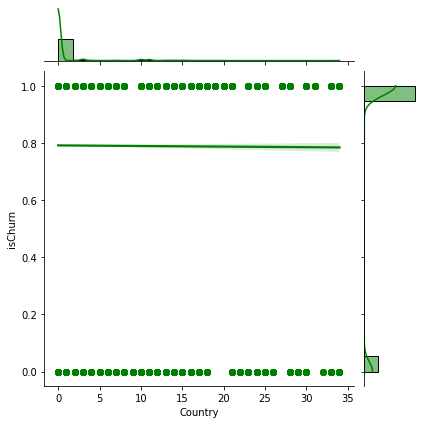

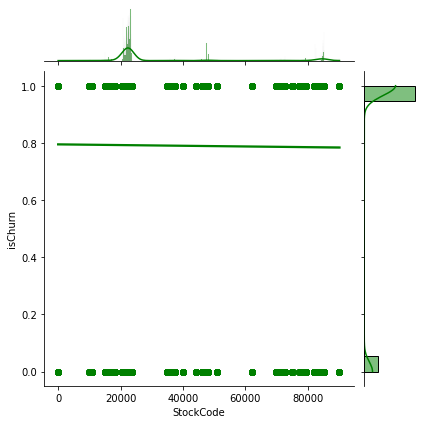

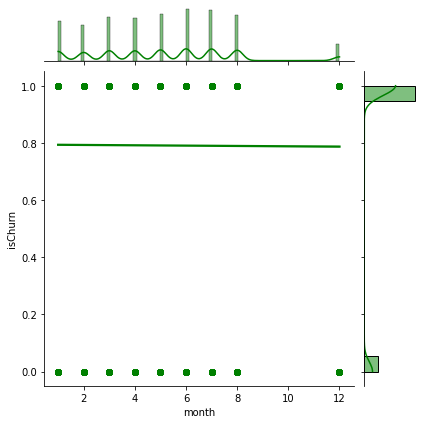

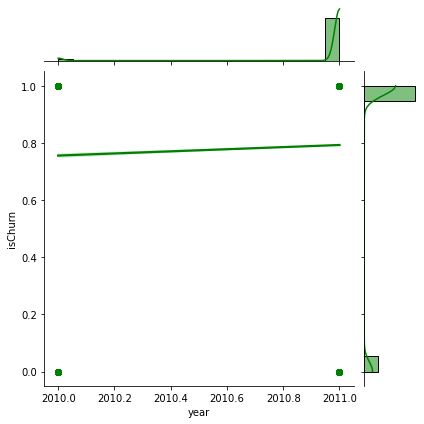

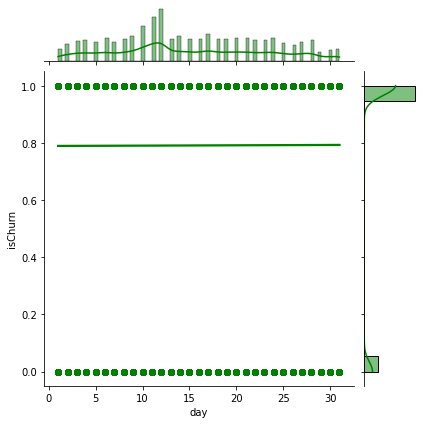

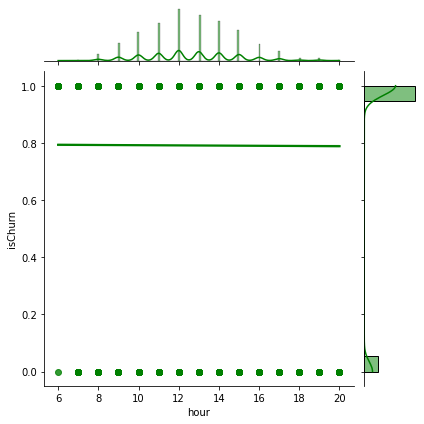

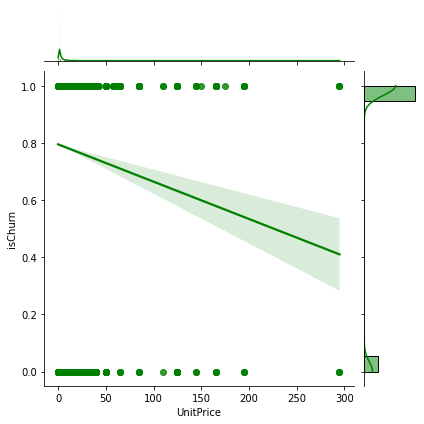

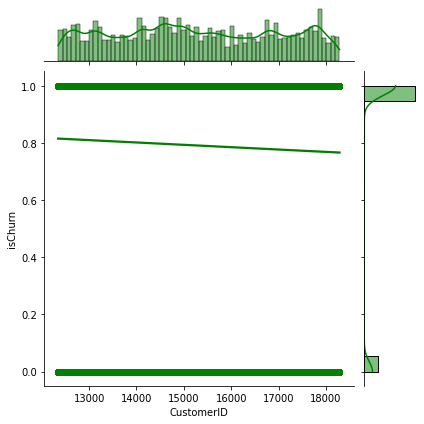

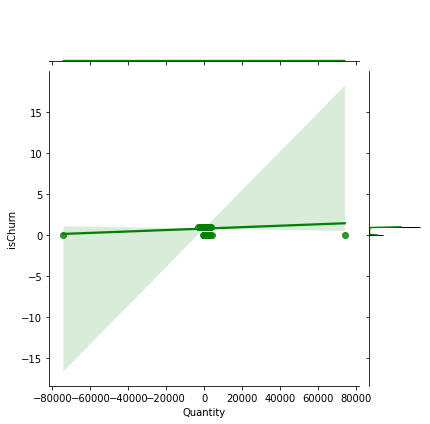

In [29]:
sns.jointplot(data=train_set, x='Country', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='StockCode', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='month', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='year', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='day', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='hour', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='UnitPrice', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='CustomerID', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='Quantity', y='isChurn', kind='reg', color='g')

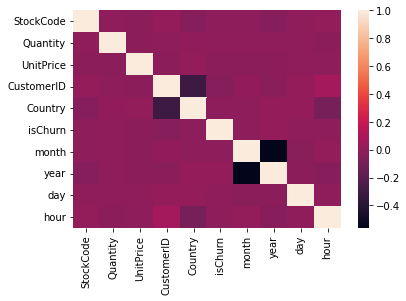

In [30]:
sns.heatmap(train_set.corr())

In [31]:
from hmac import trans_36
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler1=StandardScaler()
scaler2=MinMaxScaler()

train_set['StockCode']=scaler2.fit_transform(train_set[['StockCode']])
train_set['CustomerID']=scaler2.fit_transform(train_set[['CustomerID']])
train_set['Country']=scaler2.fit_transform(train_set[['Country']])
train_set['Quantity']=scaler1.fit_transform(train_set[['Quantity']])
train_set['UnitPrice']=scaler1.fit_transform(train_set[['UnitPrice']])
train_set['month']=scaler1.fit_transform(train_set[['month']])
train_set['year']=scaler1.fit_transform(train_set[['year']])
train_set['day']=scaler1.fit_transform(train_set[['day']])
train_set['hour']=scaler1.fit_transform(train_set[['hour']])

train_set=train_set.drop(['year'],axis=1)
train_set

,StockCode,Quantity,UnitPrice,CustomerID,Country,isChurn,month,day,hour
25281,0.249047,-0.020775,-0.291463,0.824272,0.0,1,2.623536,-0.387228,-1.158925
25282,0.931450,-0.052812,0.295214,0.824272,0.0,1,2.623536,-0.387228,-1.158925
25283,0.245089,-0.043658,0.453166,0.824272,0.0,1,2.623536,-0.387228,-1.158925
25284,0.253104,-0.034505,0.385472,0.824272,0.0,1,2.623536,-0.387228,-1.158925
25285,0.931439,-0.039082,0.182392,0.824272,0.0,1,2.623536,-0.387228,-1.158925
...,...,...,...,...,...,...,...,...,...
540272,0.235567,-0.052812,-0.485518,0.067665,0.0,1,1.119611,-0.387228,3.167983
540273,0.245045,-0.052812,-0.381721,0.067665,0.0,1,1.119611,-0.387228,3.167983
540274,0.245699,-0.052812,1.581391,0.067665,0.0,1,1.119611,-0.387228,3.167983
540275,0.243061,-0.052812,-0.194436,0.067665,0.0,1,1.119611,-0.387228,3.167983


In [32]:
y=train_set['isChurn']
x=train_set.drop(['isChurn'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [34]:
X_train,X_val,y_train,y_val = sk.model_selection.train_test_split(X_train,y_train,test_size=0.2,random_state=1)

In [35]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred = model1.predict(X_test)

In [37]:
# Evaluating decision tree
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10069   161]
 [  191 37775]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10230
           1       1.00      0.99      1.00     37966

    accuracy                           0.99     48196
   macro avg       0.99      0.99      0.99     48196
weighted avg       0.99      0.99      0.99     48196



In [38]:
#SVM
from sklearn.svm import LinearSVC

model2=LinearSVC(max_iter=5000,verbose=True)
model2.fit(X_train,y_train)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(max_iter=5000, verbose=True)

In [39]:
y_pred = model2.predict(X_test)

In [40]:
# Evaluating SVM
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0 10230]
 [    2 37964]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10230
           1       0.79      1.00      0.88     37966

    accuracy                           0.79     48196
   macro avg       0.39      0.50      0.44     48196
weighted avg       0.62      0.79      0.69     48196



In [ ]:
#ANN
from sklearn.neural_network import MLPClassifier

model3=MLPClassifier(max_iter=5000,verbose=True)
model3.fit(X_train,y_train)

In [42]:
y_pred = model3.predict(X_test)

In [43]:
# Evaluating neural network
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1731  8499]
 [ 1096 36870]]
              precision    recall  f1-score   support

           0       0.61      0.17      0.27     10230
           1       0.81      0.97      0.88     37966

    accuracy                           0.80     48196
   macro avg       0.71      0.57      0.58     48196
weighted avg       0.77      0.80      0.75     48196

